In [1]:
import urllib.request
from bs4 import BeautifulSoup as soup
import requests
import re
import pandas as pd
import dataframe_image as dfi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

rallyname = 'dOrcia'
raceDate = '6-7/04/2024'
surface = 'Gravel'
competition = 'Italy'

link = 'https://www.ewrc-results.com/results/86713-rally-della-val-dorcia-2024/?s='
startat, no_ss=454255, int(5)
extra = [455668, 455672, 455673, 455675]
canceled = []


stages = [startat +number for number in range(no_ss)]
[stages.append(l) for l in extra]
rally_23 = []
stages


/home/ilias/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[454255, 454256, 454257, 454258, 454259, 455668, 455672, 455673, 455675]

In [2]:
if canceled:
    for j in canceled: stages.remove(j-1)

In [3]:
for ss in range(0,len(stages)):
    #val= startat + ss
    #ss_a = str(val)
    
    my_url11 = link + str(stages[ss])
    req = urllib.request.Request(my_url11, headers={'User-Agent': 'Mozilla/5.0'})
    uClient11 = urllib.request.urlopen(req)
    page_html11 = uClient11.read()
    uClient11.close()
    data = pd.read_html(page_html11)[0]
    data.columns=['Pos.', 'No', 'Crew', 'Gr/Cl','ss_time', 'Diff', 'Speed']
    data['ss']=ss+1
    equal = '=' in data['Pos.'].unique()
    if equal:
        data['Pos.'] = data['Pos.'].replace('=', method='ffill')
        data['Pos.'] = data['Pos.'].astype(str).astype(float)
    #print(data.dtypes)
    #print(data)
    rally_23.append(data) 

/tmp/ipykernel_5575/4017204633.py:15: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['Pos.'] = data['Pos.'].replace('=', method='ffill')
/tmp/ipykernel_5575/4017204633.py:15: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['Pos.'] = data['Pos.'].replace('=', method='ffill')
/tmp/ipykernel_5575/4017204633.py:15: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['Pos.'] = data['Pos.'].replace('=', method='ffill')
/tmp/ipykernel_5575/4017204633.py:15: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['Pos.'] = data['Pos.'].replace('=', method='ffill')
/tmp/ipykernel_5575/4017204633.py:15: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['Pos.'] = data['Pos.']

In [4]:
rally2023_stages = pd.concat(rally_23, axis=0)

In [5]:
rally2023_stages = pd.concat(rally_23, axis=0)
rally2023_stages['Pos.'] = rally2023_stages['Pos.'].astype(int)
#rally2023_stages['No'] = rally2023_stages['No.'].str[1:]
#rally2023_stages.to_csv('03_rally2023.csv', index=False)
rally2023_stages = rally2023_stages.fillna("-")
rally2023_stages = rally2023_stages.rename(columns={'Driver / Co-driver Vehicle': "Crew"})
rally2023_stages['Race'] = rallyname
rally2023_stages['date'] = raceDate
rally2023_stages['surface'] = surface
rally2023_stages['competition'] = competition
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:14]
rally2023_stages['Gr/Cl'] = rally2023_stages['Gr/Cl'].str[-6:]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally2023_stages

,Pos.,No,Crew,Gr/Cl,ss_time,Diff,Speed,ss,Race,date,surface,competition,cou
0,1,#8,Heikkilä Mikko,Rally2,9:15.0,-,92.2,1,dOrcia,6-7/04/2024,Gravel,Italy,1
1,2,#1,Battistolli A.,Rally2,9:18.2,+3.2 + 3.2,91.6 0.23,1,dOrcia,6-7/04/2024,Gravel,Italy,2
2,3,#7,Tempestini Sim,Rally2,9:20.9,+5.9 + 2.7,91.2 0.42,1,dOrcia,6-7/04/2024,Gravel,Italy,3
3,4,#37,Zaldivar F. -,der 25,9:21.2,+6.2 + 0.3,91.2 0.44,1,dOrcia,6-7/04/2024,Gravel,Italy,4
4,5,#9,Scandola Umber,Rally2,9:21.9,+6.9 + 0.7,91.0 0.49,1,dOrcia,6-7/04/2024,Gravel,Italy,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,64,#107,Olevano Alessa,ver 55,3:32.0,+1:02.9 + 11.4,61.5 17.4,9,dOrcia,6-7/04/2024,Gravel,Italy,64
64,65,#98,Bardin Gianni,Rally5,3:33.0,+1:03.9 + 1.0,61.2 17.7,9,dOrcia,6-7/04/2024,Gravel,Italy,65
65,66,#102,Trentin Angelo,ver 55,3:44.6,+1:15.5 + 11.6,58.0 20.9,9,dOrcia,6-7/04/2024,Gravel,Italy,66
66,67,#99,Bernardi Valte,ver 55,3:54.3,+1:25.2 + 9.7,55.6 23.5,9,dOrcia,6-7/04/2024,Gravel,Italy,67


In [6]:
rally2023_stageClass=rally2023_stages.drop(['No', 'Diff', 'Speed', 'ss_time', 'cou', 'date', 'surface', 'competition'], axis=1)
rally2023_stageTimes=rally2023_stages.drop(['No', 'Diff', 'Speed', 'cou', 'date', 'surface', 'competition', 'Pos.'], axis=1)
rally2023_stageClass['Pos.'] = rally2023_stageClass['Pos.'].astype(str)
rally2023_ClassView = rally2023_stageClass.set_index(['Crew','Gr/Cl','ss','Race'], drop=True).unstack('ss')
rally2023_TimeView = rally2023_stageTimes.set_index(['Crew','Gr/Cl', 'ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView = rally2023_ClassView.fillna("-")
rally2023_TimeView = rally2023_TimeView.fillna("-")
#rally2023_stageClass2 = rally2023_stageClass.loc[((rally2023_stageClass['Group'] == 'RC1') | (rally2023_stageClass['Group'] == 'RC2'))] 
#rally2023_ClassView2 = rally2023_stageClass2.set_index(['No','Crew','Group','ss', 'Race'], drop=True).unstack('ss')
#rally2023_ClassView2 = rally2023_ClassView2.fillna("-")

In [7]:
rally2023_ClassView.to_csv(str(rallyname) +'_Stages_Classification.csv')
rally2023_TimeView.to_csv(str(rallyname) + '_Stages_Times.csv')

In [8]:
pd.set_option("display.max_columns", None)

#dfi.export(rally2023_ClassView, (str(rallyname) + '_Stages_Classification.png'))
dfi.export(rally2023_TimeView,'testtt.png')

CalledProcessError: Command '['--enable-logging', '--disable-gpu', '--headless', '--crash-dumps-dir=/home/ilias/.dataframe_image/tmpxoeli0db', '--force-device-scale-factor=1', '--window-size=1400,900', '--hide-scrollbars', '--screenshot=/home/ilias/.dataframe_image/tmpxoeli0db/temp.png', '/home/ilias/.dataframe_image/tmpxoeli0db/temp.html']' returned non-zero exit status 64.

In [7]:
rally2023_stages[['time_mm','time_ss']] = rally2023_stages['ss_time'].str.split(':', expand=True)
#rally2023_stages['time_hh']= rally2023_stages['time_hh'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_mm']= rally2023_stages['time_mm'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_ss']= pd.to_numeric(rally2023_stages['time_ss'], errors='coerce')
rally2023_stages['time_SS_sec'] = rally2023_stages['time_mm']*60 + rally2023_stages['time_ss']
rally2023_stages = rally2023_stages.drop(['Pos.', 'No', 'ss_time', 'Diff',  'Speed', 'time_mm', 'time_ss'], axis=1)
rally2023_stages.to_csv('../' + str(rallyname) + '_Stages_Times_Sec.csv',index=False)
rally2023_stages


,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec
0,Heikkilä Mikko,Rally2,1,dOrcia,6-7/04/2024,Gravel,Italy,1,555.0
1,Battistolli A.,Rally2,1,dOrcia,6-7/04/2024,Gravel,Italy,2,558.2
2,Tempestini Sim,Rally2,1,dOrcia,6-7/04/2024,Gravel,Italy,3,560.9
3,Zaldivar F. -,der 25,1,dOrcia,6-7/04/2024,Gravel,Italy,4,561.2
4,Scandola Umber,Rally2,1,dOrcia,6-7/04/2024,Gravel,Italy,5,561.9
...,...,...,...,...,...,...,...,...,...
63,Olevano Alessa,ver 55,9,dOrcia,6-7/04/2024,Gravel,Italy,64,212.0
64,Bardin Gianni,Rally5,9,dOrcia,6-7/04/2024,Gravel,Italy,65,213.0
65,Trentin Angelo,ver 55,9,dOrcia,6-7/04/2024,Gravel,Italy,66,224.6
66,Bernardi Valte,ver 55,9,dOrcia,6-7/04/2024,Gravel,Italy,67,234.3


In [8]:
min_value = rally2023_stages.groupby(['Race', 'ss'])['time_SS_sec'].min()
min_value_G = rally2023_stages.groupby(['Race', 'ss', 'Gr/Cl'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2 =  pd.DataFrame(min_value)
min_value2_G =  pd.DataFrame(min_value_G)

min_value2_G = min_value2_G.rename(columns={'time_SS_sec' : 'min_time_Gr'})
min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2_G

min_time_Gr
Race   ss Gr/Cl              
dOrcia 1  6 Plus        716.7
          A5            741.1
          Female          NaN
          N5            615.6
          R3            649.2
...                       ...
       9  Rally4        163.4
          Rally5        187.1
          der 25        151.1
          ly4/R2        185.4
          ver 55        159.0

[99 rows x 1 columns]

In [9]:
ss_times_F_G = rally2023_stages.merge(min_value2_G, on=['Race', 'ss', 'Gr/Cl'])
ss_times_F = ss_times_F_G.merge(min_value2, on=['Race', 'ss'])
ss_times_F['diff']=ss_times_F['time_SS_sec'] - ss_times_F['min_time']
ss_times_F['diff_G']=ss_times_F['time_SS_sec'] - ss_times_F['min_time_Gr']
ss_times_F['diff_G%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time_Gr'])/ss_times_F['min_time_Gr']*100
ss_times_F['SS.']=ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time_Gr,min_time,diff,diff_G,diff_G%,SS.
0,Heikkilä Mikko,Rally2,1,dOrcia,6-7/04/2024,Gravel,Italy,1,555.0,555.0,555.0,0.0,0.0,0.000000,01
1,Battistolli A.,Rally2,1,dOrcia,6-7/04/2024,Gravel,Italy,2,558.2,555.0,555.0,3.2,3.2,0.576577,01
2,Tempestini Sim,Rally2,1,dOrcia,6-7/04/2024,Gravel,Italy,3,560.9,555.0,555.0,5.9,5.9,1.063063,01
3,Scandola Umber,Rally2,1,dOrcia,6-7/04/2024,Gravel,Italy,5,561.9,555.0,555.0,6.9,6.9,1.243243,01
4,Ciuffi Tommaso,Rally2,1,dOrcia,6-7/04/2024,Gravel,Italy,6,562.4,555.0,555.0,7.4,7.4,1.333333,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,Savio Michael,Rally5,9,dOrcia,6-7/04/2024,Gravel,Italy,55,187.1,187.1,149.1,38.0,0.0,0.000000,09
665,Stella Manuele,Rally5,9,dOrcia,6-7/04/2024,Gravel,Italy,56,187.3,187.1,149.1,38.2,0.2,0.106895,09
666,Bardin Gianni,Rally5,9,dOrcia,6-7/04/2024,Gravel,Italy,65,213.0,187.1,149.1,63.9,25.9,13.842865,09
667,Scalzotto Andr,6 Plus,9,dOrcia,6-7/04/2024,Gravel,Italy,58,191.0,191.0,149.1,41.9,0.0,0.000000,09


In [10]:
ss_times_F = ss_times_F.drop(ss_times_F[ss_times_F['time_SS_sec']>=1.3*ss_times_F['min_time_Gr']].index)
ss_times_F

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time_Gr,min_time,diff,diff_G,diff_G%,SS.
0,Heikkilä Mikko,Rally2,1,dOrcia,6-7/04/2024,Gravel,Italy,1,555.0,555.0,555.0,0.0,0.0,0.000000,01
1,Battistolli A.,Rally2,1,dOrcia,6-7/04/2024,Gravel,Italy,2,558.2,555.0,555.0,3.2,3.2,0.576577,01
2,Tempestini Sim,Rally2,1,dOrcia,6-7/04/2024,Gravel,Italy,3,560.9,555.0,555.0,5.9,5.9,1.063063,01
3,Scandola Umber,Rally2,1,dOrcia,6-7/04/2024,Gravel,Italy,5,561.9,555.0,555.0,6.9,6.9,1.243243,01
4,Ciuffi Tommaso,Rally2,1,dOrcia,6-7/04/2024,Gravel,Italy,6,562.4,555.0,555.0,7.4,7.4,1.333333,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,Savio Michael,Rally5,9,dOrcia,6-7/04/2024,Gravel,Italy,55,187.1,187.1,149.1,38.0,0.0,0.000000,09
665,Stella Manuele,Rally5,9,dOrcia,6-7/04/2024,Gravel,Italy,56,187.3,187.1,149.1,38.2,0.2,0.106895,09
666,Bardin Gianni,Rally5,9,dOrcia,6-7/04/2024,Gravel,Italy,65,213.0,187.1,149.1,63.9,25.9,13.842865,09
667,Scalzotto Andr,6 Plus,9,dOrcia,6-7/04/2024,Gravel,Italy,58,191.0,191.0,149.1,41.9,0.0,0.000000,09


In [11]:
Group = 'Rally4'
#ss_times_WRC = ss_times_F[ss_times_F['Gr/Cl'].str.contains(Group)]
ss_times_WRC = ss_times_F[ss_times_F['Gr/Cl'].str.contains('|'.join(['Rally4',]))]
ss_times_WRC.to_csv('compare' + str(rallyname) + str(Group) + '.csv')
#ss_times_WRC.to_csv(str(rallyname) +'.csv')

In [12]:
ss_times_F3 =ss_times_WRC.drop(['Gr/Cl','time_SS_sec','cou', 'ss'], axis=1)
#ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff_G', index='Crew', columns=['Race', 'SS.'])
ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff_G', index='Crew', columns=['SS.'])
ss_times_F4

SS.,01,02,03,04,05,06,07,08,09
Crew,,,,,,,,,
Barone Jr. -,24.1,23.2,5.1,7.8,8.4,5.7,8.7,6.5,3.2
Bartolini Davi,13.6,19.2,12.5,5.6,13.3,3.1,10.3,12.0,4.2
Biondi S. - S,52.8,NaN,62.9,15.6,36.9,13.5,19.1,35.3,14.2
Cazzaro Nicola,10.0,7.3,11.1,3.3,7.3,4.1,3.4,5.1,2.7
Cocco Giovanni,NaN,NaN,21.2,15.5,21.2,12.3,11.6,15.7,NaN
Diserò Luca -,21.3,35.9,18.0,9.1,19.3,8.4,9.3,38.8,36.2
Farina Fabio,10.6,0.7,10.7,7.3,7.5,3.0,9.1,2.0,0.0
Leuratti Giorg,42.5,37.6,15.7,8.7,16.7,8.6,13.7,14.8,11.2
Marchioro Nico,0.0,0.0,0.0,1.0,0.0,0.0,1.6,3.6,6.7


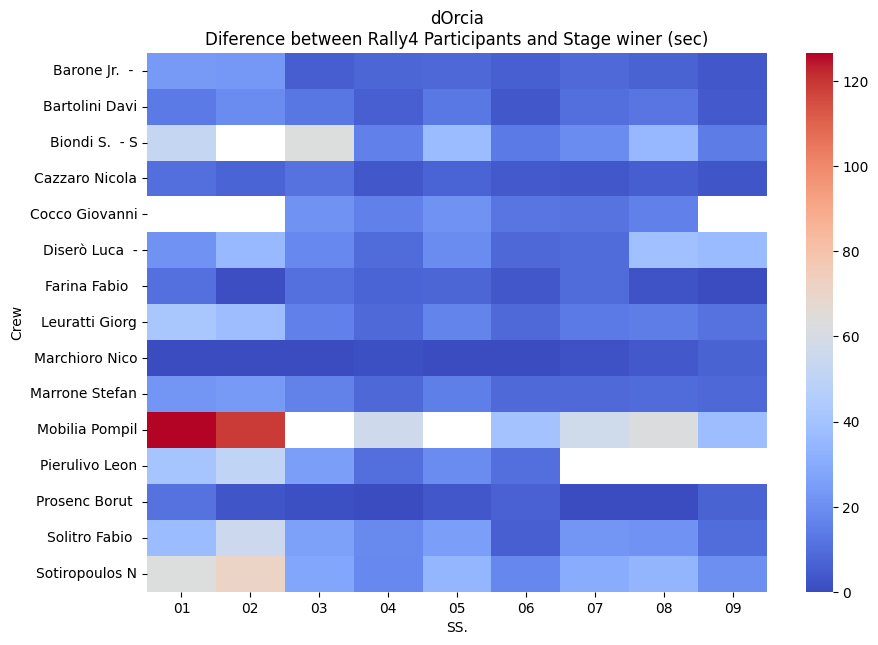

In [13]:
fig,ax = plt.subplots()
fig.set_size_inches(10,7)
Heatmap_ALL = sns.heatmap(ss_times_F4, cmap='coolwarm')
plt.title(rallyname+'\nDiference between Rally4 Participants and Stage winer (sec)')
plt.savefig(str(rallyname) + "Heatmap_.png")
plt.show()

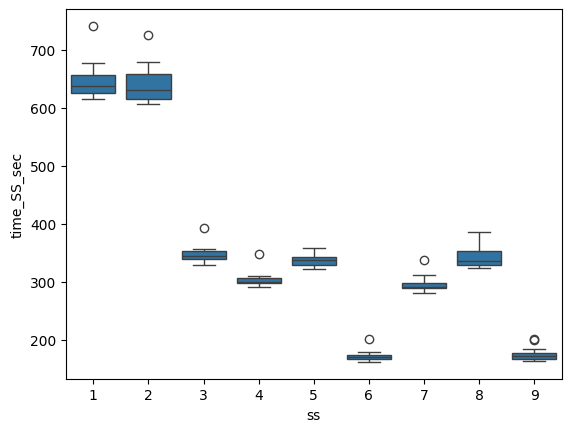

In [15]:
bplt=sns.boxplot( y=ss_times_WRC["time_SS_sec"], x=ss_times_WRC["ss"])
plt.savefig(str(rallyname) + "Boxplot2_Rally4.png")

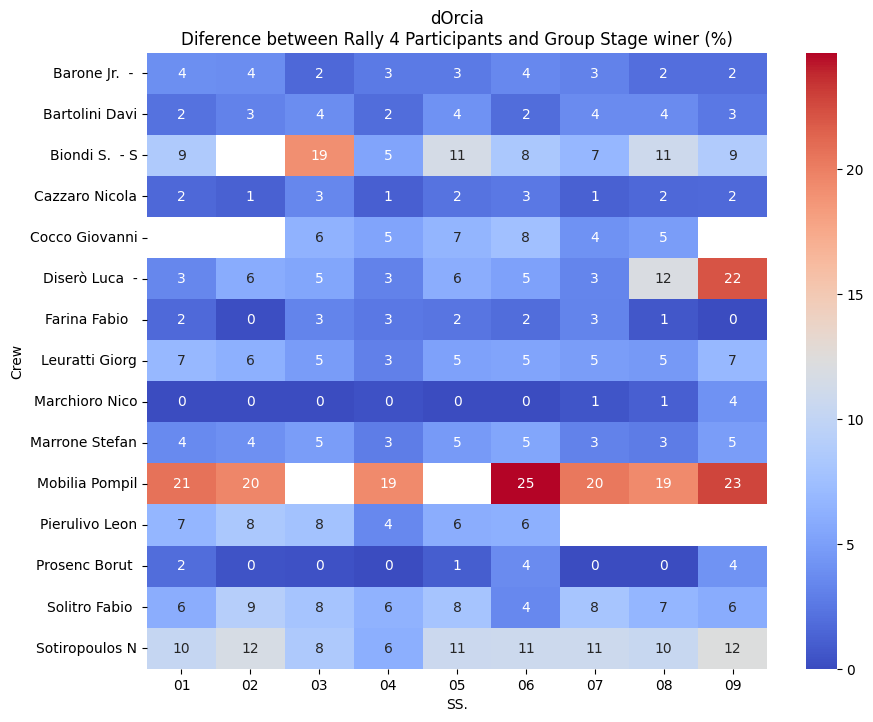

In [16]:
#ss_times_F3
fig,ax = plt.subplots()
fig.set_size_inches(10,8)
ss_timesa = pd.pivot_table(ss_times_F3, values='diff_G%', index='Crew', columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesa, annot=True, fmt=',.0f', cmap='coolwarm')
plt.title(rallyname +'\nDiference between Rally 4 Participants and Group Stage winer (%)')
plt.savefig(rallyname + " Rally4.jpg")
plt.show()